# Домашня робота №7

# Перетворення випадкових величин

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

Справедливі два твердження про квантильне перетворення:
1. Нехай випадкова величина $\xi$ має неперервну функцію розподілу $F$.
Тоді випадкова величина $\eta = F(\xi)$ має стандартний рівномірний розподіл:
$F(\xi) \sim Unif(0, 1)$.
2. Нехай $F$ - неперервна функція розподілу,
випадкова величина $\eta$ має стандартний рівномірний розподіл: $\eta \sim Unif(0, 1)$.
Тоді випадкова величина $\xi = F^{-1}(\eta)$ має функцію розподілу $F$.

# Місце для Вашого коду
$f(x) = a \sin(x) I_{[0, \pi]}(x),$

$\int_{-\infty}^{\infty}f(x)dx=1$

$\int_{-\infty}^{\infty}a \sin(x) I_{[0, \pi]}(x)dx=1$

$\int_{0}^{\pi}a \sin(x)dx=1$

$-a \cos(\pi)+a \cos(0)=1$

$a +a=1$

$2a =1$

$a=0.5$

$f(x) = 0.5 \sin(x) I_{[0, \pi]}(x),$



F(x)=\{\begin{matrix}
0, x\leq 0\\ 
0.5-0.5\cos(x),  0<x\leq \pi\\ \\ 
1, x > \pi
\end{matrix}.
 $\xi = F^{-1}(\eta)=\arccos(2\eta-1)$

E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


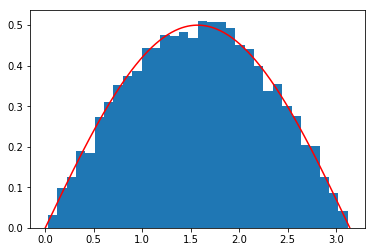

In [3]:
# Місце для Вашого коду
from scipy.stats import expon, uniform
eta=uniform()
eta_rvs=eta.rvs(10000)
xi_rvs=np.arccos(2*eta_rvs-1)
plt.hist(xi_rvs, normed=True, bins='auto')
x=np.arange(0, np.pi, 0.01)
y=0.5*np.sin(x)
plt.plot(x, y, 'r')
plt.show()


### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

$F(x)=0.5(1+erf(\frac{x}{\sqrt2}))$

$x=F^{-1}(\eta)=\sqrt2*erf^{-1}(2\eta-1)$


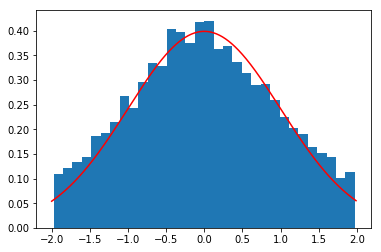

In [4]:
# Місце для Вашого коду
from scipy.stats import norm
xi=norm(0, 1)
eta=uniform()
eta_rvs=eta.rvs(10000)
y=2*eta_rvs-1
xi_rvs=np.sqrt(np.pi/2)*(y+(np.pi*y**3/12)+(7*(np.pi**2)*(y**5)/480)+(127*(np.pi**3)*(y**7)/40320)+(4369*(np.pi**4)*(y**9)/5806080))
plt.hist(xi_rvs, normed=True, bins='auto')
x=np.arange(-2, 2, 0.01)
y=xi.pdf(x)
plt.plot(x, y, 'r')
plt.show()


## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

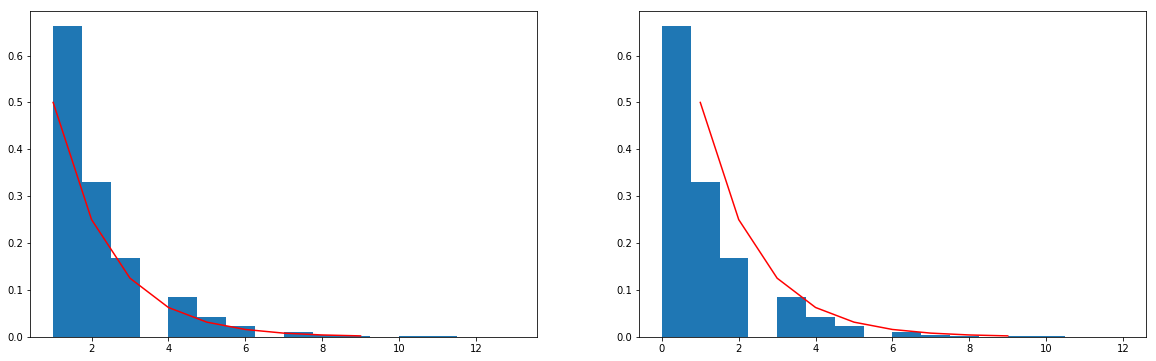

In [5]:
# Місце для Вашого коду
from scipy.stats import geom
xi=geom(0.5)
xi_rvs=xi.rvs(10000)
x=np.arange(1, 10, 1)
y=xi.pmf(x)
rvs=xi.rvs(10000)
#print(rvs)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(rvs, normed=True, bins=16)#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')

eta=(rvs-1>=0)*(rvs-1)
#print(eta)

axs[1].hist(eta, normed=True, bins=16)#axs[0].hist(rvs, dencity=True, bins='auto')
axs[1].plot(x, y, 'r')
plt.show()


## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

 $f{\eta}(y)=\sum_{x: y=e^{-x}}^{}\frac{e^{-x}}{\left | -e^{-x} \right |}=1$

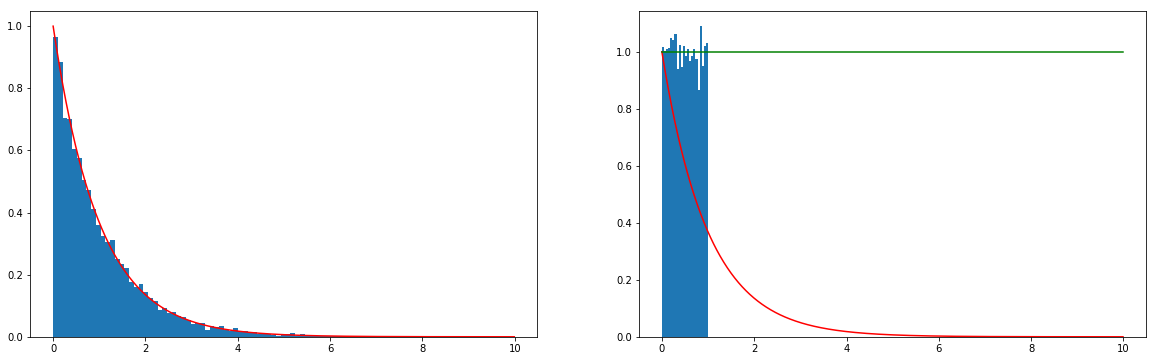

In [6]:
# Місце для Вашого коду
from scipy.stats import expon
xi=expon(loc=0, scale=1)
xi_rvs=xi.rvs(10000)
x=np.arange(0, 10, 0.01)
y=xi.pdf(x)
eta_rvs=np.exp(-xi_rvs)
#print(rvs)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(xi_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')

axs[1].hist(eta_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[1].plot(x, y, 'r')#функція щільності хі
axs[1].plot(x, 1+0*x, 'g')#функція щільності ета
plt.show()


### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

 $f{\eta}(y)=\sum_{x: y=x^{2}}^{}\frac{e^{-x}}{\left | 2x \right |}=\frac{e^{-\sqrt y}}{ 2\sqrt y }$

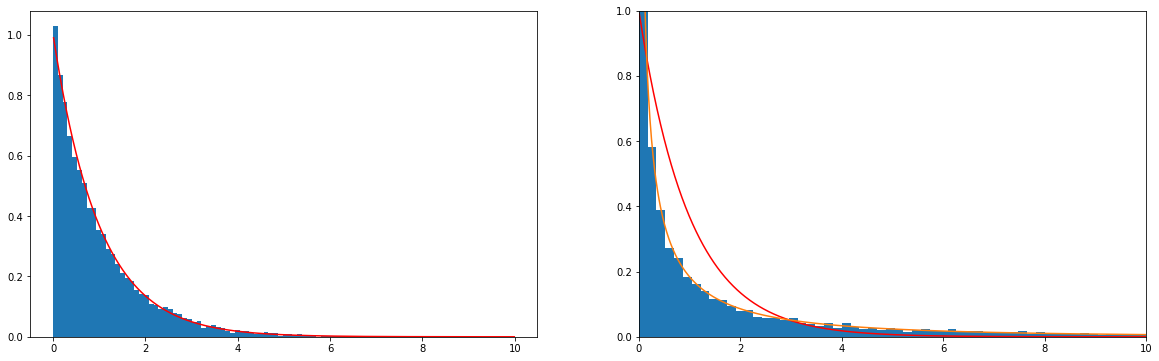

In [7]:
# Місце для Вашого коду

from scipy.stats import expon
xi=expon(loc=0, scale=1)
xi_rvs=xi.rvs(10000)
x=np.arange(0.01, 10, 0.01)
y=xi.pdf(x)
eta_rvs=xi_rvs**2
#print(rvs)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(xi_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')

axs[1].hist(eta_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[1].plot(x, y, 'r')#функція щільності хі
axs[1].plot(x, np.exp(-np.sqrt(x)) / (2 * np.sqrt(x)))

axs[1].set_xlim(0, 10)
axs[1].set_ylim(0, 1)
plt.show()

## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

 $f{\eta}(y)=\sum_{x: y=3x-2}^{}\frac{I_{[0, 1]}(x)}{\left | 3 \right |}=\frac{I_{[-2, 1]}(y)}{ 3 }$

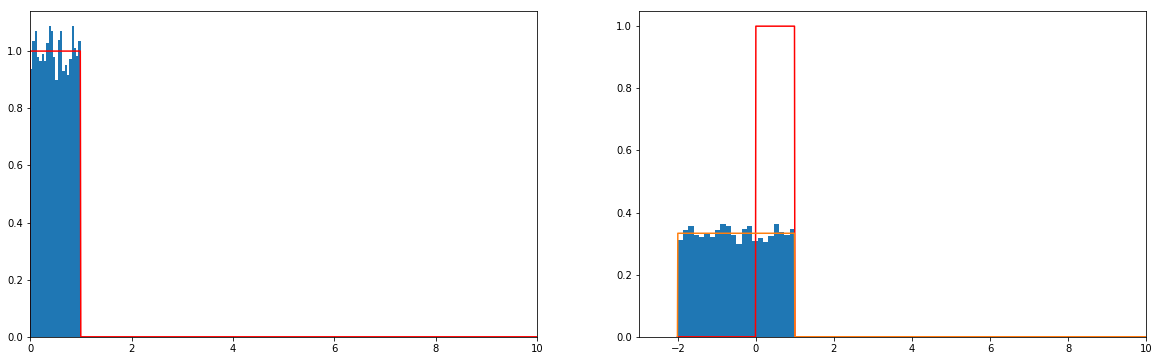

In [8]:
# Місце для Вашого коду

xi=uniform()
# Місце для Вашого коду

xi_rvs=xi.rvs(10000)
x=np.arange(-2.01, 10, 0.01)
y=xi.pdf(x)
eta_rvs=3*xi_rvs-2
#print(rvs)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(xi_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')
axs[0].set_xlim(0, 10)
axs[1].hist(eta_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[1].plot(x, y, 'r')#функція щільності хі
axs[1].plot(x, (x>=-2)*(x<=1)/3)

axs[1].set_xlim(-3, 10)
#axs[1].set_ylim(0, 1)
plt.show()

### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

 $f{\eta}(y)=\sum_{x: y=|2x-1|}^{}\frac{I_{[0, 1]}(x)}{\left | 2 \right |}=2\frac{I_{[0, 1]}(y)}{ 2 }=I_{[0, 1]}(y)$

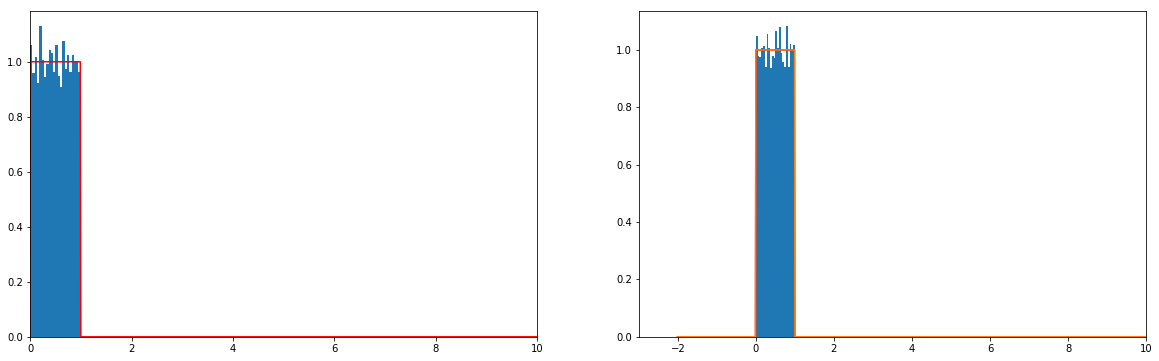

In [9]:
xi=uniform()
# Місце для Вашого коду

xi_rvs=xi.rvs(10000)
x=np.arange(-2.01, 10, 0.01)
y=xi.pdf(x)
eta_rvs=abs(2*xi_rvs-1)
#print(rvs)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(xi_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')
axs[0].set_xlim(0, 10)
axs[1].hist(eta_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[1].plot(x, y, 'r')#функція щільності хі
axs[1].plot(x, (x>=0)*(x<=1))

axs[1].set_xlim(-3, 10)
#axs[1].set_ylim(0, 1)
plt.show()


### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

 $f{\eta}(y)=\sum_{x: y=-ln(x)}^{}\frac{I_{[0, 1]}(x)}{|-\frac{1}{x}|}=I_{[0, \infty]}(y)e^{-y}$

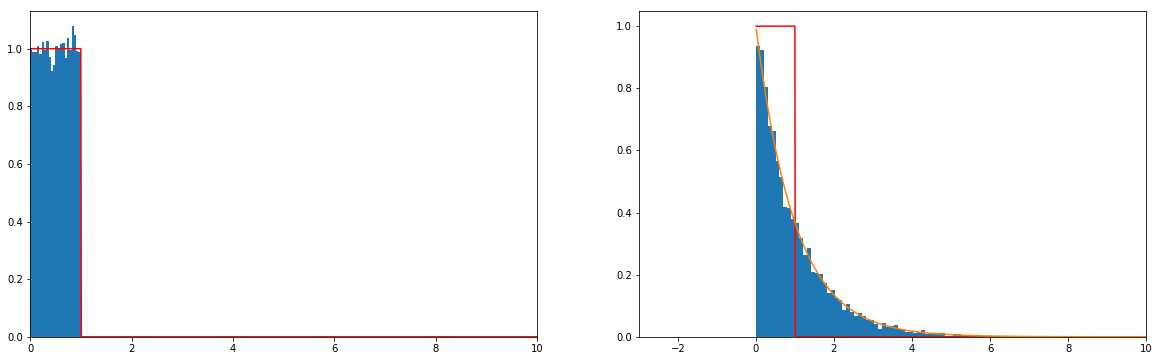

In [10]:
# Місце для Вашого коду

xi=uniform()
# Місце для Вашого коду

xi_rvs=xi.rvs(10000)
x=np.arange(0.01, 10, 0.01)
y=xi.pdf(x)
eta_rvs=-np.log(xi_rvs)
#print(rvs)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(xi_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')
axs[0].set_xlim(0, 10)
axs[1].hist(eta_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[1].plot(x, y, 'r')#функція щільності хі
axs[1].plot(x, (x>=0)*np.e**(-x))

axs[1].set_xlim(-3, 10)
#axs[1].set_ylim(0, 1)
plt.show()


## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [11]:
# Місце для Вашого коду

x=uniform(loc=0, scale=1)
y=uniform(loc=0, scale=1)
x_rvs=x.rvs(100000)
y_rvs=y.rvs(100000)


Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

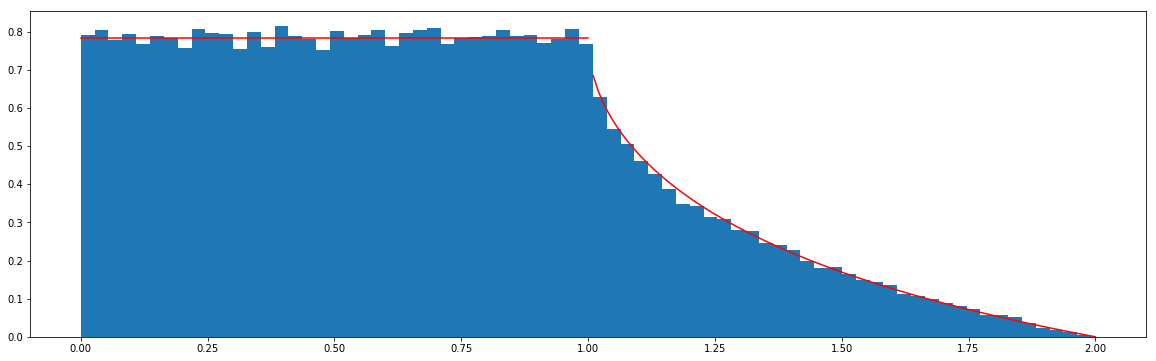

In [12]:
# Місце для Вашого коду
psi1_rvs=x_rvs**2+y_rvs**2
fig, axs=plt.subplots(1, 1, figsize=(20, 6))

    
x=np.arange(1.01, 2+0.01, 0.01)


y= (np.pi/4 - np.arccos(1 / np.sqrt(x)))*(1 < x)*(x <= 2)
x_=np.arange(0, 1+0.01, 0.01)
y_=( np.pi / 4)*(0 <= x_)*(x_<= 1) 

axs.hist(psi1_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs.plot(x, y, 'r')
axs.plot(x_, y_, 'r')
plt.show()


Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

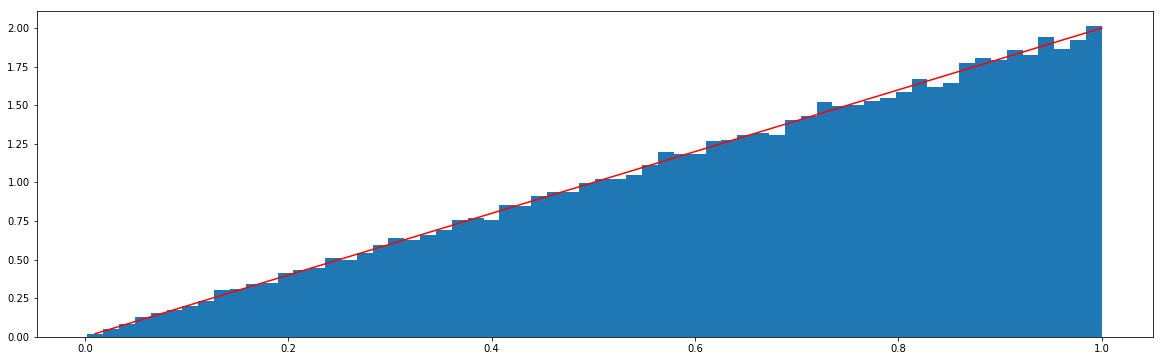

In [13]:
# Місце для Вашого коду

psi2_rvs=np.maximum(x_rvs, y_rvs)
fig, axs=plt.subplots(1, 1, figsize=(20, 6))

    
x=np.arange(0.01, 1+0.01, 0.01)


y= 2*x
 

axs.hist(psi2_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs.plot(x, y, 'r')

plt.show()


Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

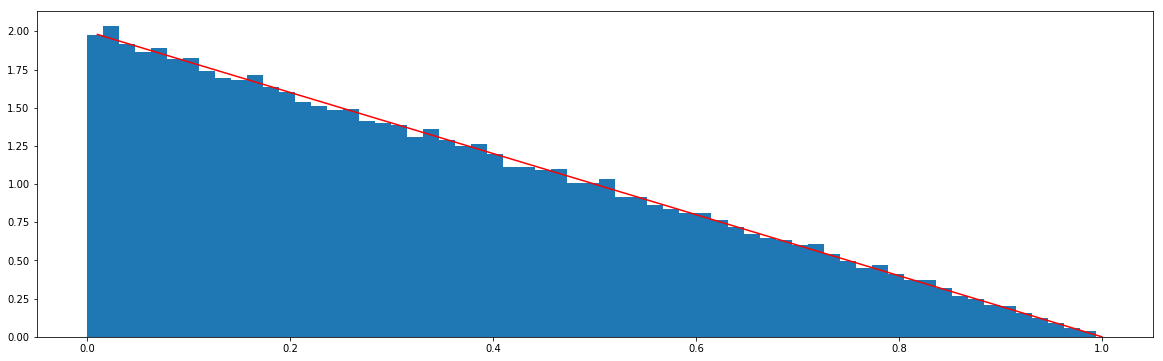

In [14]:
# Місце для Вашого коду


psi3_rvs=abs(x_rvs - y_rvs)
fig, axs=plt.subplots(1, 1, figsize=(20, 6))

    
x=np.arange(0.01, 1+0.01, 0.01)


y= 2*(1-x)
 

axs.hist(psi3_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs.plot(x, y, 'r')

plt.show()
